In [1]:
import os
from keras import layers
from keras import models
from keras import optimizers


# fill this part
from keras.preprocessing.image import ImageDataGenerator



base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=90,
      width_shift_range=0.4,
      height_shift_range=0.4,
      shear_range=0.9,
      zoom_range=0.8,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='reflect'
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')


Using TensorFlow backend.


Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.


In [ ]:
from matplotlib import pyplot
# prepare iterator
# generate samples and plot
images, labels = train_generator.next()
print(images.shape[0])

for i in range(images.shape[0]):
    print(i)
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # convert to unsigned integers for viewing
    image = images[i].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
conv_base.summary()
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(150, 150, 3))


In [ ]:
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

In [39]:
from keras.applications import VGG16
from keras import regularizers
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

for layer in conv_base.layers[:15]:
    layer.trainable = False
#for i, layer in enumerate(conv_base.layers):
#    print(i, layer.name, layer.trainable)
#model.summary()
model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(lr=0.001),
              optimizer=optimizers.adam(lr=0.0001),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      #steps_per_epoch=60,
      epochs=100,
      validation_data=validation_generator,
      #validation_steps=4
)


Epoch 1/100
53/53 [==============================] - 19s 352ms/step - loss: 1.0408 - acc: 0.5373 - val_loss: 0.0580 - val_acc: 0.7641
Epoch 2/100
53/53 [==============================] - 16s 301ms/step - loss: 0.7173 - acc: 0.6878 - val_loss: 0.2301 - val_acc: 0.7868
Epoch 3/100
53/53 [==============================] - 16s 300ms/step - loss: 0.6130 - acc: 0.7361 - val_loss: 0.0134 - val_acc: 0.8659
Epoch 4/100
53/53 [==============================] - 16s 298ms/step - loss: 0.5958 - acc: 0.7439 - val_loss: 0.2008 - val_acc: 0.8539
Epoch 5/100
53/53 [==============================] - 16s 293ms/step - loss: 0.5599 - acc: 0.7761 - val_loss: 0.0098 - val_acc: 0.8874
Epoch 6/100
53/53 [==============================] - 16s 301ms/step - loss: 0.5515 - acc: 0.7833 - val_loss: 0.0096 - val_acc: 0.9281
Epoch 7/100
53/53 [==============================] - 16s 304ms/step - loss: 0.5462 - acc: 0.7654 - val_loss: 0.0093 - val_acc: 0.9341
Epoch 8/100
53/53 [==============================] - 16s 307ms

Epoch 62/100
53/53 [==============================] - 22s 408ms/step - loss: 0.2725 - acc: 0.8919 - val_loss: 0.0077 - val_acc: 0.9629
Epoch 63/100
53/53 [==============================] - 16s 303ms/step - loss: 0.2742 - acc: 0.8949 - val_loss: 0.0077 - val_acc: 0.9641
Epoch 64/100
53/53 [==============================] - 16s 303ms/step - loss: 0.2731 - acc: 0.8907 - val_loss: 0.0076 - val_acc: 0.9617
Epoch 65/100
53/53 [==============================] - 16s 302ms/step - loss: 0.2593 - acc: 0.8955 - val_loss: 0.0076 - val_acc: 0.9545
Epoch 66/100
53/53 [==============================] - 17s 326ms/step - loss: 0.3002 - acc: 0.8890 - val_loss: 0.0076 - val_acc: 0.9617
Epoch 67/100
53/53 [==============================] - 16s 298ms/step - loss: 0.2966 - acc: 0.8907 - val_loss: 0.0076 - val_acc: 0.9593
Epoch 68/100
53/53 [==============================] - 16s 306ms/step - loss: 0.2563 - acc: 0.9045 - val_loss: 0.0076 - val_acc: 0.9701
Epoch 69/100
53/53 [==============================] - 1

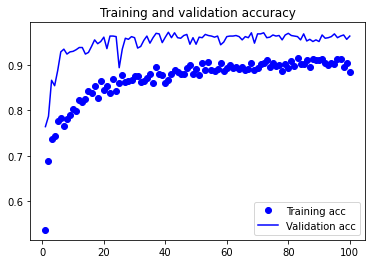

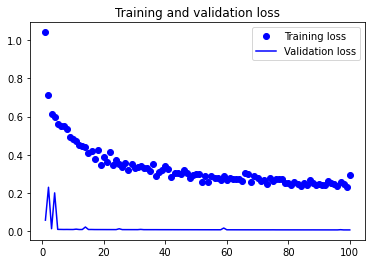

Found 200 images belonging to 4 classes.
test accuracy: 96.50%


In [44]:
model.save('modelQ5.try6') #important do not change the name of the model

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

import numpy as np
test_dir= os.path.join(base_dir, 'test') # very important: do not change this!



datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
        test_dir, 
        target_size=(150, 150), 
        batch_size=32, 
        class_mode='categorical')

loss , acc = model.evaluate_generator(generator=test_generator)
print("test accuracy: {:5.2f}%".format(100*acc))

In [43]:
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
        test_dir, 
        target_size=(150, 150), 
        batch_size=10, 
        class_mode='categorical', shuffle=False)

#loss , acc = model.evaluate_generator(generator=test_generator, verbose=1)
#test_generator.reset()
pred = model.predict_generator(generator=test_generator, verbose=1)


predicted_class_indices = np.argmax(pred, axis=1)
#print("predicted_class_indices ", predicted_class_indices)
labels = (test_generator.class_indices)
#print(labels)
label = dict((v,k) for k,v in labels.items())
predictions = [label[i] for i in predicted_class_indices]

filenames = test_generator.filenames

label_to_class_name = {
    'c0' : 'cat',
    'c1' : 'dog',
    'c2' : 'car',
    'c3' : 'motorbike'
}
count = 0
for idx in range(len(filenames )):
    y_hat = predictions[idx]
    y = filenames[idx].split('/')[0]
    if y_hat != y:
        print('predict  ' , label_to_class_name[y_hat])
        print('true value ', label_to_class_name[y])    
        print('filename    ' , filenames[idx])
        count += 1
print('failed ', count)
#test_sets = test_generator.next()
#for test in test_sets:
#    output = conv_base.predict(test)
    #print(output.shape)
    #result = model.predict(output)
    #print(result[0])

Found 200 images belonging to 4 classes.
20/20 [==============================] - 1s 39ms/step
predict   dog
true value  cat
filename     c0/cat_0688.jpg
predict   cat
true value  dog
filename     c1/dog_0527.jpg
predict   cat
true value  dog
filename     c1/dog_0528.jpg
predict   cat
true value  dog
filename     c1/dog_0531.jpg
predict   cat
true value  dog
filename     c1/dog_0533.jpg
predict   cat
true value  dog
filename     c1/dog_0551.jpg
predict   cat
true value  dog
filename     c1/dog_0552.jpg
failed  7


In [42]:
datagen = ImageDataGenerator(rescale=1./255)

validation_generator = datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical', shuffle=False)

#loss , acc = model.evaluate_generator(generator=test_generator, verbose=1)
#test_generator.reset()
pred = model.predict_generator(generator=validation_generator, verbose=1)


predicted_class_indices = np.argmax(pred, axis=1)
#print("predicted_class_indices ", predicted_class_indices)
labels = (validation_generator.class_indices)
#print(labels)
label = dict((v,k) for k,v in labels.items())
predictions = [label[i] for i in predicted_class_indices]

filenames = validation_generator.filenames

label_to_class_name = {
    'c0' : 'cat',
    'c1' : 'dog',
    'c2' : 'car',
    'c3' : 'motorbike'
}
count = 0
for idx in range(len(filenames )):
    y_hat = predictions[idx]
    y = filenames[idx].split('/')[0]
    if y_hat != y:
        print('predict  ' , label_to_class_name[y_hat])
        print('true value ', label_to_class_name[y])    
        print('filename    ' , filenames[idx])
        count += 1
print('failed ', count)

Found 835 images belonging to 4 classes.
27/27 [==============================] - 3s 106ms/step
predict   dog
true value  cat
filename     c0/cat_0448.jpg
predict   dog
true value  cat
filename     c0/cat_0457.jpg
predict   dog
true value  cat
filename     c0/cat_0469.jpg
predict   dog
true value  cat
filename     c0/cat_0484.jpg
predict   dog
true value  cat
filename     c0/cat_0496.jpg
predict   dog
true value  cat
filename     c0/cat_0514.jpg
predict   dog
true value  cat
filename     c0/cat_0535.jpg
predict   dog
true value  cat
filename     c0/cat_0586.jpg
predict   dog
true value  cat
filename     c0/cat_0589.jpg
predict   dog
true value  cat
filename     c0/cat_0596.jpg
predict   dog
true value  cat
filename     c0/cat_0623.jpg
predict   dog
true value  cat
filename     c0/cat_0635.jpg
predict   dog
true value  cat
filename     c0/cat_0641.jpg
predict   cat
true value  dog
filename     c1/dog_0365.jpg
predict   cat
true value  dog
filename     c1/dog_0370.jpg
predict   cat
true 